In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iotdataset/IoT Network Intrusion Dataset Undersampled.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn import tree
from sklearn.preprocessing import StandardScaler

In [4]:
df = pd.read_csv('/kaggle/input/iotdataset/IoT Network Intrusion Dataset Undersampled.csv')

In [5]:
df

,Unnamed: 0,Src_Port,Dst_Port,Protocol,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,...,Dst_1,Dst_2,Dst_3,Date,Month,Hour,Minute,Seconds,AM/PM,Normal
0,17,-1.138106,2.004022,-0.694809,-0.179158,-0.196043,-0.354896,-0.295937,0.326101,-0.393593,...,0.62365,-0.794672,-0.709910,0.148069,-1.414987,0.112918,1.775813,0.174984,0,1
1,33,-1.138106,2.185859,-0.694809,-0.172399,-0.196043,-0.354896,-0.295937,0.326101,-0.393593,...,0.62365,-0.794672,-0.709910,-1.840901,1.690085,-0.233242,1.654815,0.002351,0,0
2,38,-1.220703,-0.851415,-0.694809,0.754273,0.567610,0.354889,-0.322974,-0.375599,-0.454420,...,0.62365,-0.794672,-0.769741,0.893933,-1.414987,2.189877,-1.249132,1.210788,1,0
3,45,0.652199,-0.360371,-0.694809,-0.177993,-0.196043,-0.354896,-0.322974,-0.375599,-0.454420,...,0.62365,-0.794672,-0.769741,-0.970727,0.137549,-0.925562,-0.704642,0.462708,0,0
4,47,-1.138106,2.004022,-0.694809,-0.190112,-0.386957,0.354889,-0.322974,-0.375599,-0.454420,...,0.62365,-0.794672,-0.709910,0.148069,-1.414987,0.112918,1.836312,1.613600,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77191,625724,0.532646,-0.360371,-0.694809,-0.113200,-0.386957,1.064674,-0.322974,1.729500,-0.454420,...,0.62365,-0.794672,-0.769741,0.148069,-1.414987,0.459077,-1.551627,-1.321176,0,1
77192,625732,-1.138106,2.004022,-0.694809,-0.123222,-0.005130,-0.354896,0.954975,0.326101,2.359863,...,0.62365,-0.794672,-0.709910,0.148069,-1.414987,0.112918,1.896811,1.728689,0,1
77193,625752,-1.138106,2.004022,-0.694809,-0.126718,0.185784,-0.354896,2.205886,0.326101,2.359863,...,0.62365,-0.794672,-0.709910,0.148069,-1.414987,0.459077,-1.612126,-1.033453,0,1
77194,625776,-1.149619,0.253523,-0.694809,0.047382,-0.386957,0.354889,-0.322974,-0.375599,-0.454420,...,0.62365,-0.794672,-0.550360,-1.840901,-0.638719,2.536036,1.049826,-0.170283,1,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77196 entries, 0 to 77195
Data columns (total 77 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         77196 non-null  int64  
 1   Src_Port           77196 non-null  float64
 2   Dst_Port           77196 non-null  float64
 3   Protocol           77196 non-null  float64
 4   Flow_Duration      77196 non-null  float64
 5   Tot_Fwd_Pkts       77196 non-null  float64
 6   Tot_Bwd_Pkts       77196 non-null  float64
 7   TotLen_Fwd_Pkts    77196 non-null  float64
 8   TotLen_Bwd_Pkts    77196 non-null  float64
 9   Fwd_Pkt_Len_Max    77196 non-null  float64
 10  Fwd_Pkt_Len_Min    77196 non-null  float64
 11  Fwd_Pkt_Len_Mean   77196 non-null  float64
 12  Fwd_Pkt_Len_Std    77196 non-null  float64
 13  Bwd_Pkt_Len_Max    77196 non-null  float64
 14  Bwd_Pkt_Len_Min    77196 non-null  float64
 15  Bwd_Pkt_Len_Mean   77196 non-null  float64
 16  Bwd_Pkt_Len_Std    771

In [7]:
df.shape[0]

77196

In [8]:
df.shape[1]

77

In [9]:
df.isnull().sum()

Unnamed: 0       0
Src_Port         0
Dst_Port         0
Protocol         0
Flow_Duration    0
                ..
Hour             0
Minute           0
Seconds          0
AM/PM            0
Normal           0
Length: 77, dtype: int64

In [10]:
df.dropna(inplace=True)

In [11]:
df.nunique()

Unnamed: 0       77196
Src_Port          5899
Dst_Port           416
Protocol             3
Flow_Duration     4770
                 ...  
Hour                 6
Minute              54
Seconds             60
AM/PM                2
Normal               2
Length: 77, dtype: int64

In [12]:
df.columns

Index(['Unnamed: 0', 'Src_Port', 'Dst_Port', 'Protocol', 'Flow_Duration',
       'Tot_Fwd_Pkts', 'Tot_Bwd_Pkts', 'TotLen_Fwd_Pkts', 'TotLen_Bwd_Pkts',
       'Fwd_Pkt_Len_Max', 'Fwd_Pkt_Len_Min', 'Fwd_Pkt_Len_Mean',
       'Fwd_Pkt_Len_Std', 'Bwd_Pkt_Len_Max', 'Bwd_Pkt_Len_Min',
       'Bwd_Pkt_Len_Mean', 'Bwd_Pkt_Len_Std', 'Flow_Byts/s', 'Flow_Pkts/s',
       'Flow_IAT_Mean', 'Flow_IAT_Std', 'Flow_IAT_Max', 'Flow_IAT_Min',
       'Fwd_IAT_Tot', 'Fwd_IAT_Mean', 'Fwd_IAT_Std', 'Fwd_IAT_Max',
       'Fwd_IAT_Min', 'Bwd_IAT_Tot', 'Bwd_IAT_Mean', 'Bwd_IAT_Std',
       'Bwd_IAT_Max', 'Bwd_IAT_Min', 'Bwd_PSH_Flags', 'Bwd_URG_Flags',
       'Fwd_Header_Len', 'Bwd_Header_Len', 'Fwd_Pkts/s', 'Bwd_Pkts/s',
       'Pkt_Len_Min', 'Pkt_Len_Max', 'Pkt_Len_Mean', 'Pkt_Len_Std',
       'Pkt_Len_Var', 'FIN_Flag_Cnt', 'SYN_Flag_Cnt', 'RST_Flag_Cnt',
       'ACK_Flag_Cnt', 'CWE_Flag_Count', 'ECE_Flag_Cnt', 'Down/Up_Ratio',
       'Pkt_Size_Avg', 'Init_Bwd_Win_Byts', 'Fwd_Act_Data_Pkts', 'Active_Mean',
  

In [15]:
constant_columns = df.columns[df.nunique() == 1]
constant_columns

Index([], dtype='object')

In [19]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns 
numerical_columns

Index(['Unnamed: 0', 'Src_Port', 'Dst_Port', 'Protocol', 'Flow_Duration',
       'Tot_Fwd_Pkts', 'Tot_Bwd_Pkts', 'TotLen_Fwd_Pkts', 'TotLen_Bwd_Pkts',
       'Fwd_Pkt_Len_Max', 'Fwd_Pkt_Len_Min', 'Fwd_Pkt_Len_Mean',
       'Fwd_Pkt_Len_Std', 'Bwd_Pkt_Len_Max', 'Bwd_Pkt_Len_Min',
       'Bwd_Pkt_Len_Mean', 'Bwd_Pkt_Len_Std', 'Flow_Byts/s', 'Flow_Pkts/s',
       'Flow_IAT_Mean', 'Flow_IAT_Std', 'Flow_IAT_Max', 'Flow_IAT_Min',
       'Fwd_IAT_Tot', 'Fwd_IAT_Mean', 'Fwd_IAT_Std', 'Fwd_IAT_Max',
       'Fwd_IAT_Min', 'Bwd_IAT_Tot', 'Bwd_IAT_Mean', 'Bwd_IAT_Std',
       'Bwd_IAT_Max', 'Bwd_IAT_Min', 'Bwd_PSH_Flags', 'Bwd_URG_Flags',
       'Fwd_Header_Len', 'Bwd_Header_Len', 'Fwd_Pkts/s', 'Bwd_Pkts/s',
       'Pkt_Len_Min', 'Pkt_Len_Max', 'Pkt_Len_Mean', 'Pkt_Len_Std',
       'Pkt_Len_Var', 'FIN_Flag_Cnt', 'SYN_Flag_Cnt', 'RST_Flag_Cnt',
       'ACK_Flag_Cnt', 'CWE_Flag_Count', 'ECE_Flag_Cnt', 'Down/Up_Ratio',
       'Pkt_Size_Avg', 'Init_Bwd_Win_Byts', 'Fwd_Act_Data_Pkts', 'Active_Mean',
  

In [22]:
catcol = df.select_dtypes(include=['object']).columns
catcol

Index([], dtype='object')

In [24]:
# maybe Normal is the target 

df['Normal'].unique()

array([1, 0])

In [25]:
df['Normal'].value_counts()

Normal
1    38598
0    38598
Name: count, dtype: int64

<Axes: >

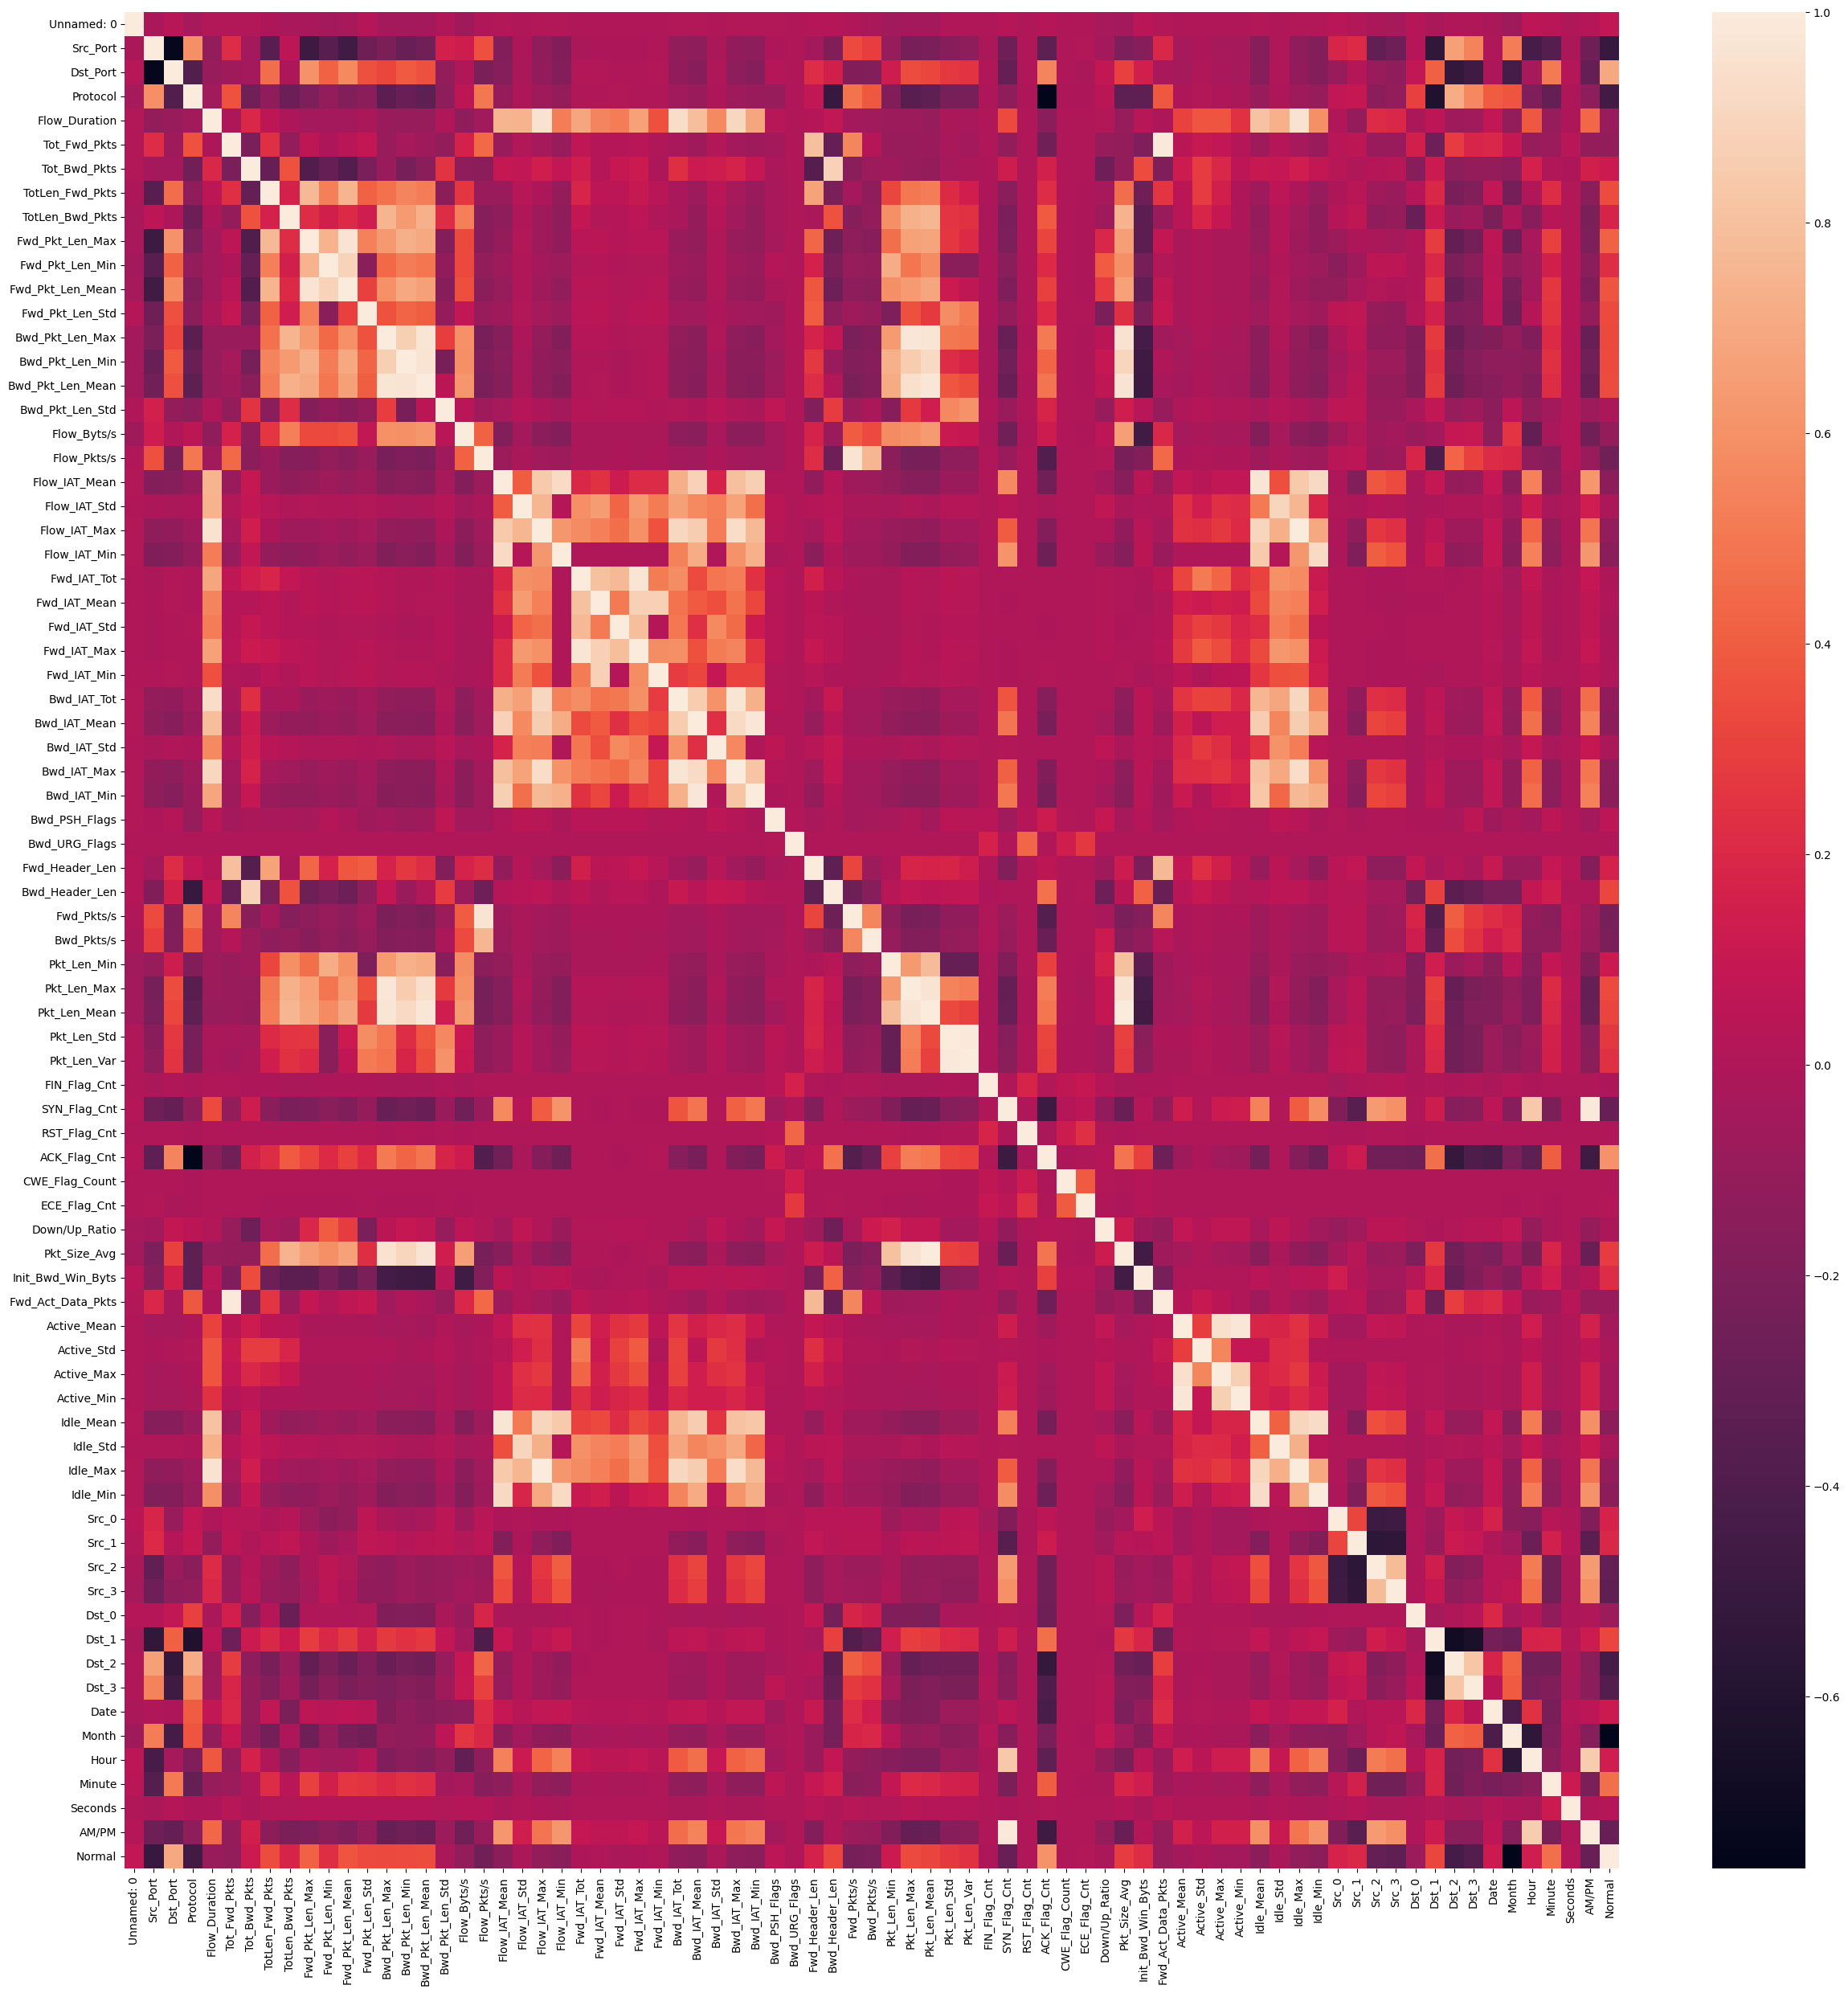

In [26]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr())

In [28]:
columns = ['Src_Port', 'Dst_Port', 'Protocol', 'Flow_Duration',
       'Tot_Fwd_Pkts', 'Tot_Bwd_Pkts', 'TotLen_Fwd_Pkts', 'TotLen_Bwd_Pkts',
       'Fwd_Pkt_Len_Max', 'Fwd_Pkt_Len_Min', 'Fwd_Pkt_Len_Mean',
       'Fwd_Pkt_Len_Std', 'Bwd_Pkt_Len_Max', 'Bwd_Pkt_Len_Min',
       'Bwd_Pkt_Len_Mean', 'Bwd_Pkt_Len_Std', 'Flow_Byts/s', 'Flow_Pkts/s',
       'Flow_IAT_Mean', 'Flow_IAT_Std', 'Flow_IAT_Max', 'Flow_IAT_Min',
       'Fwd_IAT_Tot', 'Fwd_IAT_Mean', 'Fwd_IAT_Std', 'Fwd_IAT_Max',
       'Fwd_IAT_Min', 'Bwd_IAT_Tot', 'Bwd_IAT_Mean', 'Bwd_IAT_Std',
       'Bwd_IAT_Max', 'Bwd_IAT_Min', 'Bwd_PSH_Flags', 'Bwd_URG_Flags',
       'Fwd_Header_Len', 'Bwd_Header_Len', 'Fwd_Pkts/s', 'Bwd_Pkts/s',
       'Pkt_Len_Min', 'Pkt_Len_Max', 'Pkt_Len_Mean', 'Pkt_Len_Std',
       'Pkt_Len_Var', 'FIN_Flag_Cnt', 'SYN_Flag_Cnt', 'RST_Flag_Cnt',
       'ACK_Flag_Cnt', 'CWE_Flag_Count', 'ECE_Flag_Cnt', 'Down/Up_Ratio',
       'Pkt_Size_Avg', 'Init_Bwd_Win_Byts', 'Fwd_Act_Data_Pkts', 'Active_Mean',
       'Active_Std', 'Active_Max', 'Active_Min', 'Idle_Mean', 'Idle_Std',
       'Idle_Max', 'Idle_Min']


In [29]:
df['Protocol'].value_counts()

Protocol
-0.694809    62262
 1.385704    14448
-1.829635      486
Name: count, dtype: int64

<Axes: xlabel='Protocol', ylabel='count'>

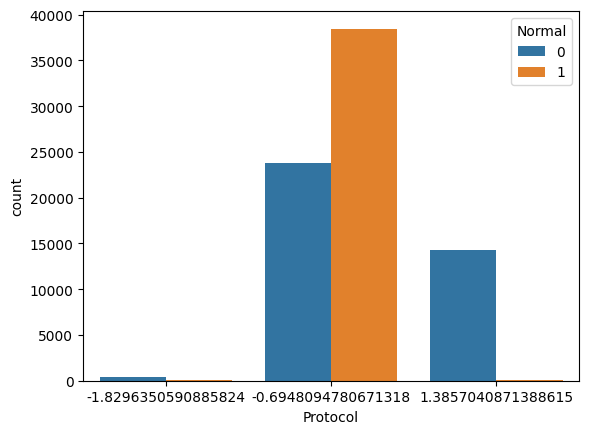

In [30]:
sns.countplot(x = 'Protocol', hue = 'Normal', data = df)

So it seems like this data was transformed already and ready for train

In [31]:
someRangeCat = df.columns[df.nunique() < 10]
someRangeCat

Index(['Protocol', 'Bwd_PSH_Flags', 'Bwd_URG_Flags', 'FIN_Flag_Cnt',
       'SYN_Flag_Cnt', 'RST_Flag_Cnt', 'ACK_Flag_Cnt', 'CWE_Flag_Count',
       'ECE_Flag_Cnt', 'Down/Up_Ratio', 'Date', 'Month', 'Hour', 'AM/PM',
       'Normal'],
      dtype='object')

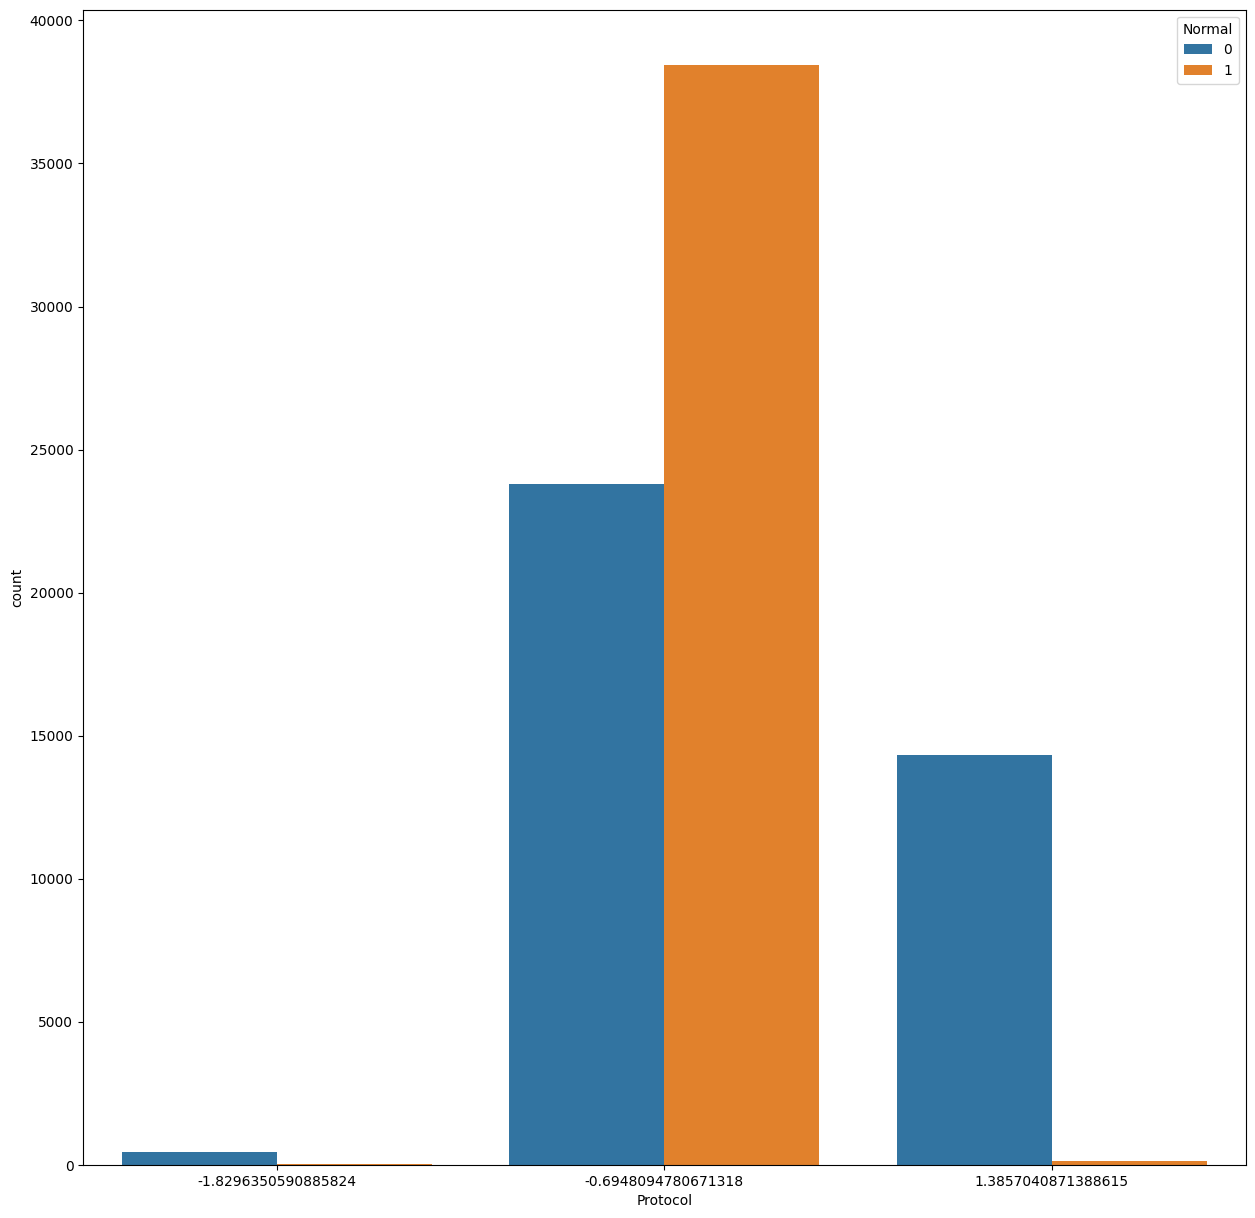

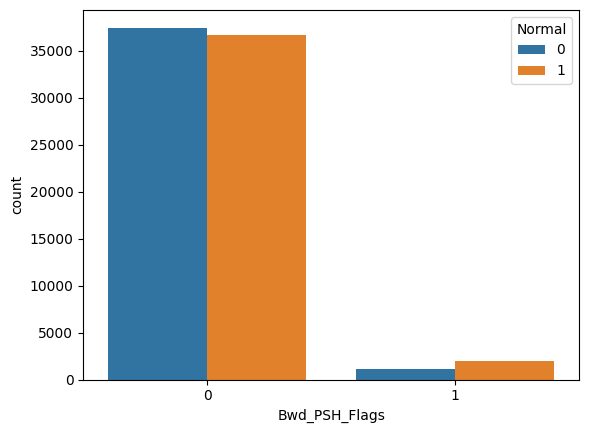

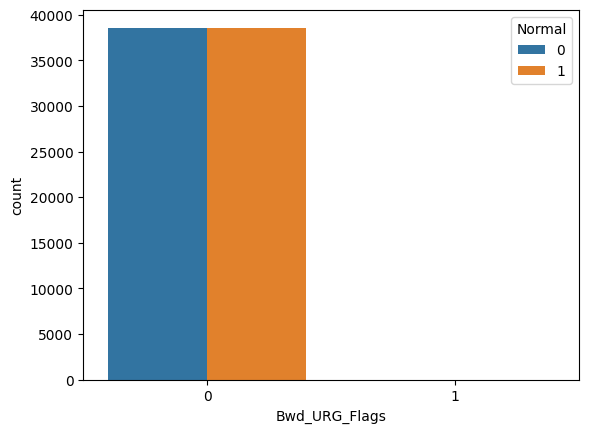

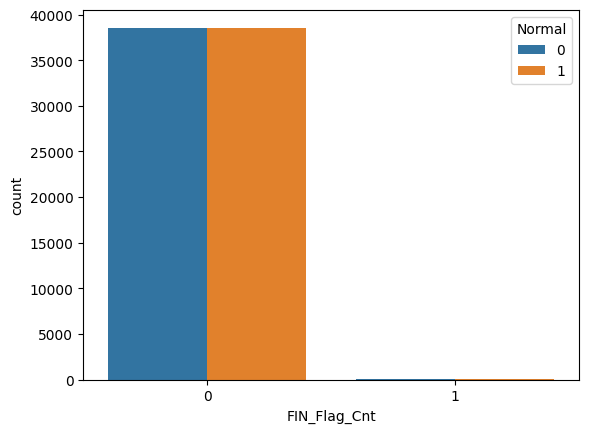

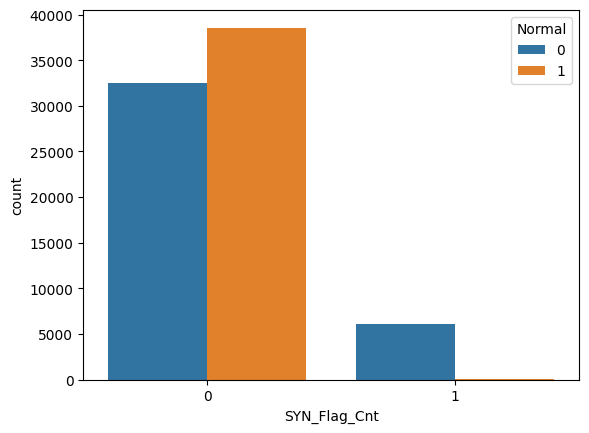

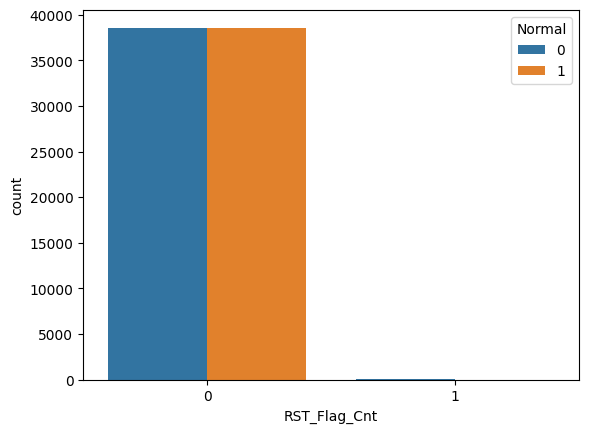

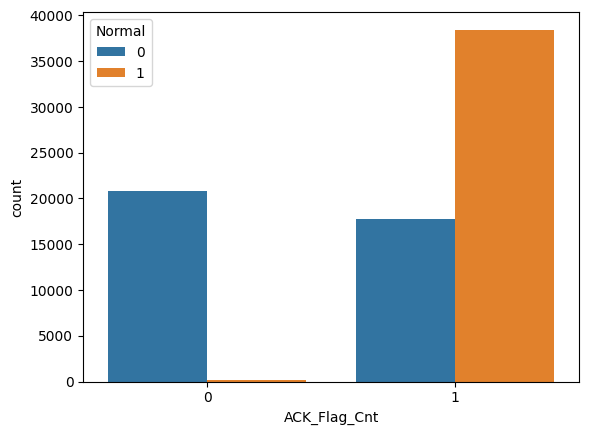

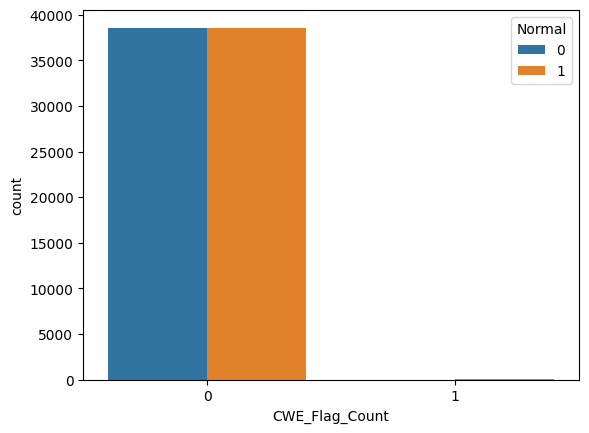

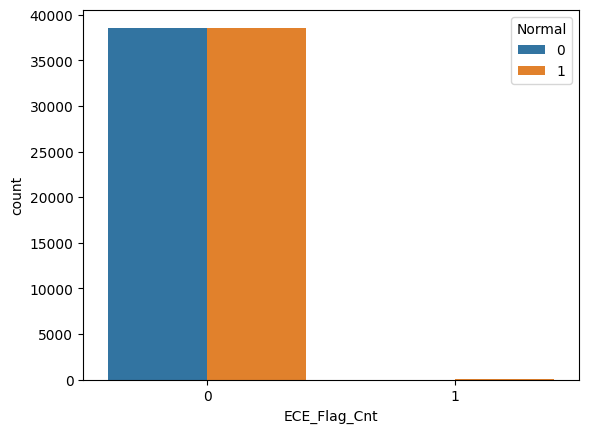

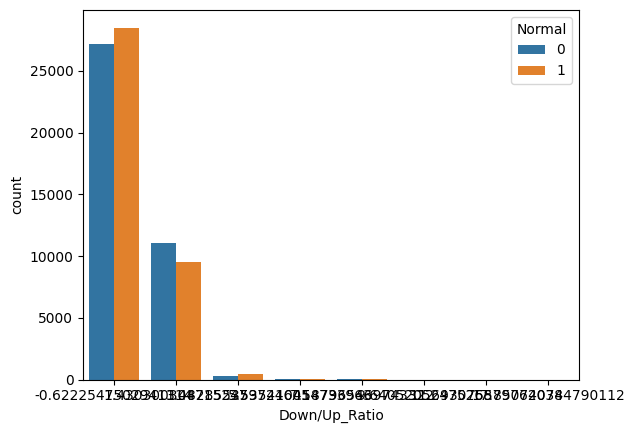

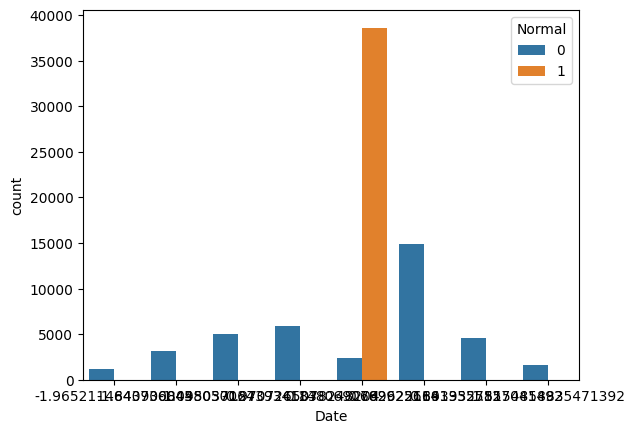

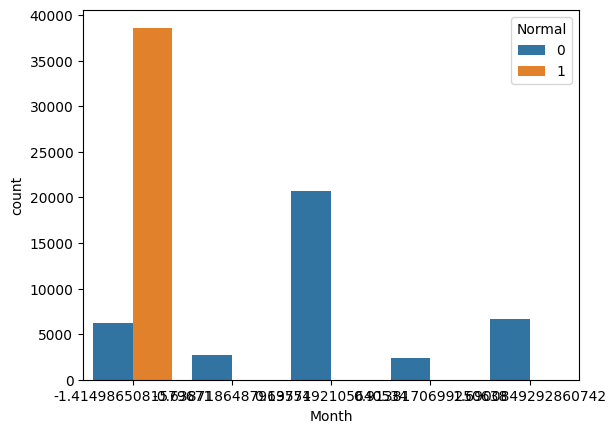

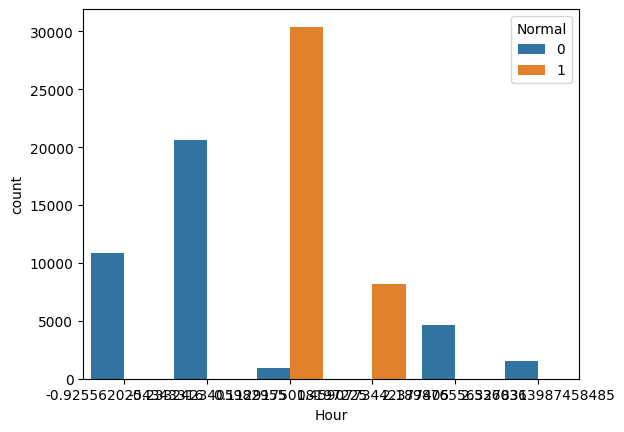

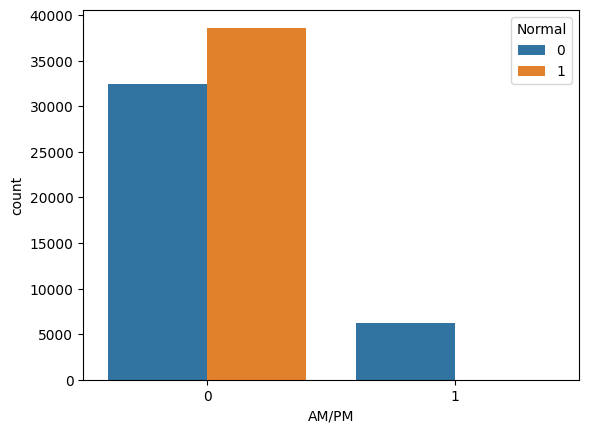

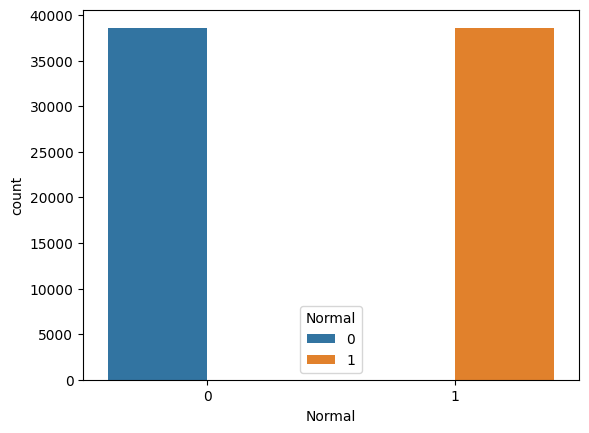

In [32]:
plt.figure(figsize=(15,15))
for cat in someRangeCat:
    sns.countplot(x = cat, hue = 'Normal', data = df)
    plt.show()

All of these are categorical data but transformed by standard or ordinal transformation.. 
And we can see that there has more attack on specific date even on some hours and AM / Pm.  Some attacks are performed on different month, Down and Up time also plays a significant role in the data set. 

In [34]:
x = df.drop(['Normal'], axis = 1)
y = df['Normal']
x_train, x_test, y_train, y_test = train_test_split(x,y , test_size=0.3, random_state=40)

ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test = ss.fit_transform(x_test)

target_class = df['Normal'].unique()
target_class

array([1, 0])

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11403
           1       1.00      1.00      1.00     11756

    accuracy                           1.00     23159
   macro avg       1.00      1.00      1.00     23159
weighted avg       1.00      1.00      1.00     23159



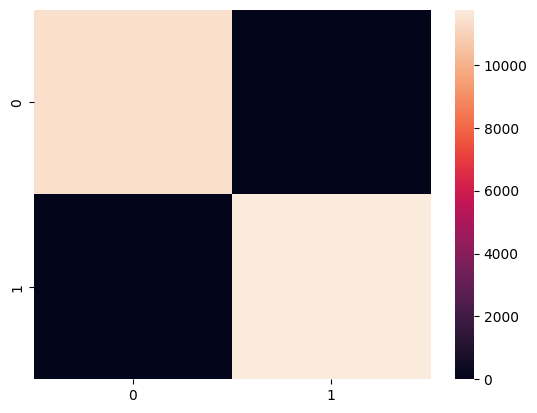

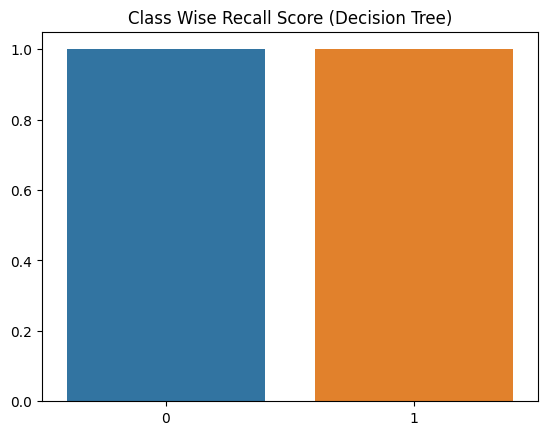

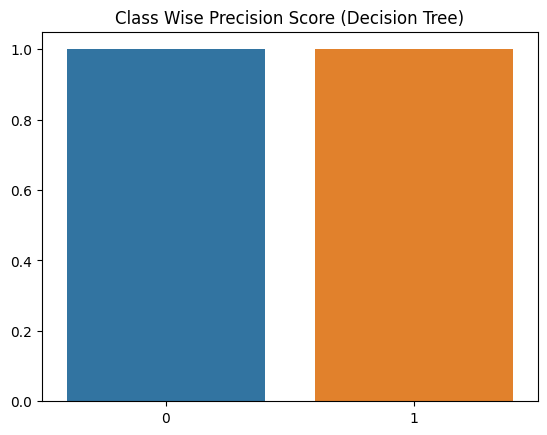

In [35]:
DTC_Classifier = tree.DecisionTreeClassifier()
DTC_Classifier.fit(x_train, y_train)

y_pred = DTC_Classifier.predict( x_test )

print( classification_report( y_test , y_pred ) )

matrix = confusion_matrix( y_test , y_pred )
sns.heatmap( matrix )
plt.show()

sns.barplot( x = target_class ,y = recall_score( y_test , y_pred , average =  None) )
plt.title( "Class Wise Recall Score (Decision Tree)")
plt.show()

sns.barplot( x = target_class ,y = precision_score( y_test , y_pred , average =  None) )
plt.title( "Class Wise Precision Score (Decision Tree)")
plt.show()


In [36]:

matrix

array([[11403,     0],
       [    0, 11756]])

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11403
           1       1.00      1.00      1.00     11756

    accuracy                           1.00     23159
   macro avg       1.00      1.00      1.00     23159
weighted avg       1.00      1.00      1.00     23159



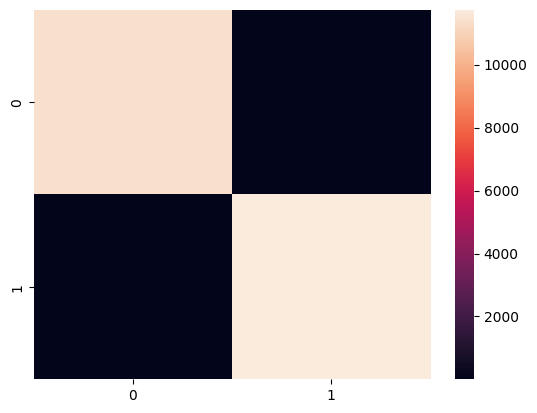

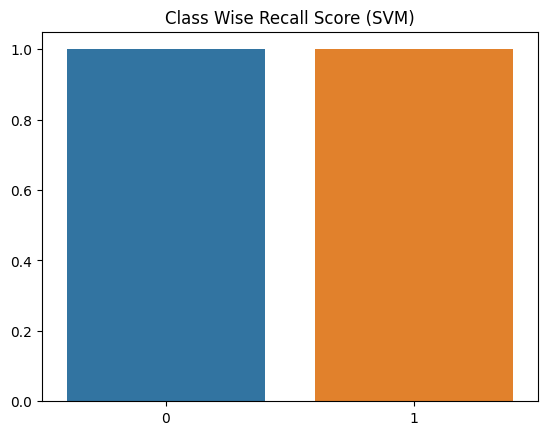

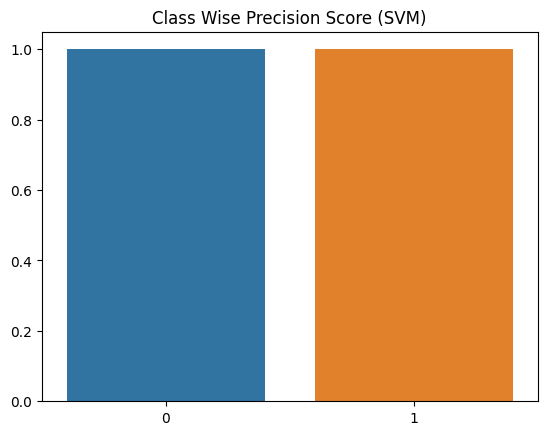

In [37]:
clf = SVC()
clf.fit( x_train , y_train )

y_pred = clf.predict( x_test )

print( classification_report( y_test , y_pred ) )

matrix = confusion_matrix( y_test , y_pred )
sns.heatmap( matrix )
plt.show()

sns.barplot( x = target_class ,y = recall_score( y_test , y_pred , average =  None) )
plt.title( "Class Wise Recall Score (SVM)")
plt.show()

sns.barplot( x = target_class ,y = precision_score( y_test , y_pred , average =  None) )
plt.title( "Class Wise Precision Score (SVM)")
plt.show()


In [38]:
matrix

array([[11398,     5],
       [    9, 11747]])